## Customer Segmentation Based on Telecommunication




A client in the telecommunications industry has a pre-paid price plan that offers different calling rates depending on
the subscriber location and time of day when the call is made. The varying rate is achieved by applying a variable
discount to the base call rate of R2.50. Discounts are applied per cell tower, so all subscribers calling at the same
time on a cell receive the same discount for that time slot. The original intention of the price plan was to provide
cheaper rates where there was spare capacity on the cell, however there is potential to use the functionality for
more strategic marketing ventures with the aim of growing revenue, minutes of use and/or market share.

In [4]:
# import some useful libraries for this task
import scipy.io
from matplotlib import pylab as plt
import numpy as np
import scipy.io
import pandas as pd
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
cellClassificationData = pd.read_csv("./MATLAB_CONVERTED_DATA/cellClassificationData.csv") # cellClassification Data
# CellsVec -----unique identification of cell towers
cellsVec = pd.read_csv("./MATLAB_CONVERTED_DATA/cellsVec1.csv")

# Feature data (Revenue, Discount and Duration)
onnetDiscMatrix = pd.read_csv("./MATLAB_CONVERTED_DATA/onnetDiscMatrix1.csv",parse_dates=True, header=None)

onnetDurMatrix = pd.read_csv("./MATLAB_CONVERTED_DATA/onnetDurMatrix1.csv",parse_dates=True,header=None)

onnetRevMatrix = pd.read_csv("./MATLAB_CONVERTED_DATA/onnetRevMatrix1.csv",parse_dates=True,header=None)

timestampVec = pd.read_csv("./MATLAB_CONVERTED_DATA/timestampVec.csv", parse_dates=True)

#capacity2Matrix = pd.read_csv("./MATLAB_CONVERTED_DATA/capacity2Matrix.txt")

#erlangCombMatrix = pd.read_csv("./MATLAB_CONVERTED_DATA/erlangCombMatrix.txt")

In [5]:
# Extrac the first hour in each of the corresponding features
onnetRevMatrix, onnetDiscMatrix, onnetDurMatrix = onnetRevMatrix.drop(onnetRevMatrix.index[0]), onnetDiscMatrix.drop(onnetDiscMatrix.index[0]) , onnetDurMatrix.drop(onnetDurMatrix.index[0])

In [6]:
# Take a transpose of each of the features to reshape to (num_cellTowers, hours)
onnetRevMatrix1, onnetDiscMatrix1, onnetDurMatrix1 = onnetRevMatrix.T, onnetDiscMatrix.T , onnetDurMatrix.T

#### Cell Classification data

In [7]:
cellClassificationData.head()

,CELL,TECHNOLOGY,CLUSTERTYPE,PROVINCE
0,1001A,2G,Premium,GAUTENG
1,1001A1,3G,Premium,GAUTENG
2,1001A2,3G,Premium,GAUTENG
3,1001B,2G,Premium,GAUTENG
4,1001B1,3G,Premium,GAUTENG


In [8]:
import graphlab
#graphlab.canvas.set_target('ipynb')
full_data = graphlab.SFrame.read_csv("./MATLAB_CONVERTED_DATA/cellClassificationData.csv")

This non-commercial license of GraphLab Create for academic use is assigned to maxpanziyuan@gmail.com and will expire on August 15, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1548393941.log


Finished parsing file /home/mhla/Documents/Opt-Num-Solutions/MATLAB_CONVERTED_DATA/cellClassificationData.csv

Parsing completed. Parsed 100 lines in 0.068952 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/mhla/Documents/Opt-Num-Solutions/MATLAB_CONVERTED_DATA/cellClassificationData.csv

Parsing completed. Parsed 35634 lines in 0.039629 secs.

In [9]:
# Conut each unique word corresponding to the province column
full_data['word_count'] = graphlab.text_analytics.count_words(full_data['PROVINCE'])

#### Distributed count of unique province

In [11]:
full_data.head()

CELL,TECHNOLOGY,CLUSTERTYPE,PROVINCE,word_count
1001A,2G,Premium,GAUTENG,{'gauteng': 1}
1001A1,3G,Premium,GAUTENG,{'gauteng': 1}
1001A2,3G,Premium,GAUTENG,{'gauteng': 1}
1001B,2G,Premium,GAUTENG,{'gauteng': 1}
1001B1,3G,Premium,GAUTENG,{'gauteng': 1}
1001B2,3G,Premium,GAUTENG,{'gauteng': 1}
1001C,2G,Premium,GAUTENG,{'gauteng': 1}
1001C1,3G,Premium,GAUTENG,{'gauteng': 1}
1001C2,3G,Premium,GAUTENG,{'gauteng': 1}
1002A,2G,High,GAUTENG,{'gauteng': 1}


In [12]:
# List the names of all unique provinces
full_data['PROVINCE'].unique()

dtype: str
Rows: 10
['KWAZULU-NATAL', 'WESTERN CAPE', 'NORTHERN CAPE', 'EASTERN CAPE', 'GAUTENG', 'LIMPOPO', 'null', 'NORTH WEST', 'FREE STATE', 'MPUMALANGA']

### Distribution number of cell towers corresponding to each province

This is the summary distribution for the number of cell towers in each province

In [13]:
full_data['PROVINCE'].sketch_summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      | 35634 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   10  |    No    |
+------------------+-------+----------+

Most frequent items:
+-------+---------+---------------+--------------+--------------+------------+
| value | GAUTENG | KWAZULU-NATAL | WESTERN CAPE | EASTERN CAPE | FREE STATE |
+-------+---------+---------------+--------------+--------------+------------+
| count |  12318  |      6127     |     4675     |     3578     |    2549    |
+-------+---------+---------------+--------------+--------------+------------+
+------------+------------+---------+---------------+------+
| MPUMALANGA | NORTH WEST | LIMPOPO | NORTHERN CAPE | null |
+------------+------------+---------+---------------+------+
|    1884    |    1753    |   1723  |      993      |  34  |
+------------+------------+---------+---------------+-----

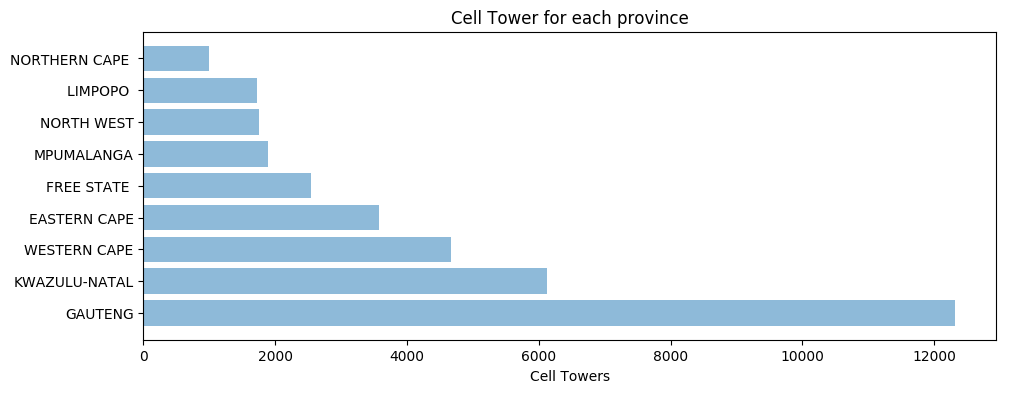

In [14]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(11,4))
objects = ('GAUTENG', 'KWAZULU-NATAL', 'WESTERN CAPE', 'EASTERN CAPE', 'FREE STATE ', 'MPUMALANGA','NORTH WEST','LIMPOPO ','NORTHERN CAPE ')
y_pos = np.arange(len(objects))
performance = [12318,6127,4675,3578,2549,1884,1753,1723,993]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Cell Towers')
plt.title('Cell Tower for each province')
plt.savefig("t1.png") 
plt.show()

In [15]:
# This is the distribution for unique technology
full_data['TECHNOLOGY'].sketch_summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      | 35634 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   2   |    No    |
+------------------+-------+----------+

Most frequent items:
+-------+-------+-------+
| value |   3G  |   2G  |
+-------+-------+-------+
| count | 18658 | 16976 |
+-------+-------+-------+


In [16]:
# This is the distribution for unique clustertype
full_data['CLUSTERTYPE'].sketch_summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      | 35634 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   3   |    No    |
+------------------+-------+----------+

Most frequent items:
+-------+-------+---------+------+
| value |  High | Premium | Good |
+-------+-------+---------+------+
| count | 14581 |  12702  | 8351 |
+-------+-------+---------+------+


In [20]:
New_data = pd.DataFrame()
New_data['Revenue'], New_data['Discount'],New_data['Duration'] =  onnetRevMatrix1[1], onnetDiscMatrix1[1], onnetDurMatrix[1]

In [22]:
New_data = pd.DataFrame(New_data)

In [24]:
New_data = New_data.fillna(0)
New_data.head()

,Revenue,Discount,Duration
0,0,85,0
1,0,85,0
2,0,85,0
3,0.78,85,0
4,0,85,0


In [25]:
from sklearn import preprocessing
def get_data(stock_name, normalize=True):
    """
    Return a dataframe of that stock and normalize all the values. 
    """
    df = pd.DataFrame()
    onnetRevMatrix = pd.read_csv("./MATLAB_CONVERTED_DATA/onnetRevMatrix1.csv",parse_dates=True,header=None)
    onnetDurMatrix = pd.read_csv("./MATLAB_CONVERTED_DATA/onnetDurMatrix1.csv",parse_dates=True,header=None)
    onnetDiscMatrix = pd.read_csv("./MATLAB_CONVERTED_DATA/onnetDiscMatrix1.csv",parse_dates=True, header=None)

  
    df["Discount"] = onnetDiscMatrix[0]
    df["Duration"] = onnetDurMatrix[0]
    df["Revenue"]  = onnetRevMatrix[0]
    df.dropna(inplace=True)

    #if normalize:
        #min_max_scaler = preprocessing.MinMaxScaler()
        #df['Revenue'] = min_max_scaler.fit_transform(df.Revenue.values.reshape(-1,1))
    return df#, min_max_scaler

In [27]:
stock_name = './MATLAB_CONVERTED_DATA/onnetRevMatrix1.csv'
Data = get_data(stock_name, normalize=True)

In [28]:
Data= Data.replace('onnetRevMatrix1',0)
Data=Data.replace('onnetDurMatrix1',0)
Data = Data.replace('onnetDiscMatrix1',0)
min_max_scaler = preprocessing.MinMaxScaler()
Data['Revenue'] = min_max_scaler.fit_transform(Data.Revenue.values.reshape(-1,1))
Data['Duration'] = min_max_scaler.fit_transform(Data.Duration.values.reshape(-1,1))
Data['Discount'] = min_max_scaler.fit_transform(Data.Discount.values.reshape(-1,1))
Data = Data[Data.index != 0]

/home/mhla/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
Data.head()

,Discount,Duration,Revenue
1,0.85,0.000000,0.000000
2,1.00,1.000000,0.000000
3,0.90,0.001016,0.000298
4,0.90,0.000203,0.000000
5,0.75,0.000000,0.000000


### Data Preprocessing

In this part, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful

#### Implementation: Feature Scaling


If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the min-max-scaler 

\begin{equation}
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
\end{equation}

\begin{equation}
X_scaled = X_std * (max - min) + min
\end{equation}

/home/mhla/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


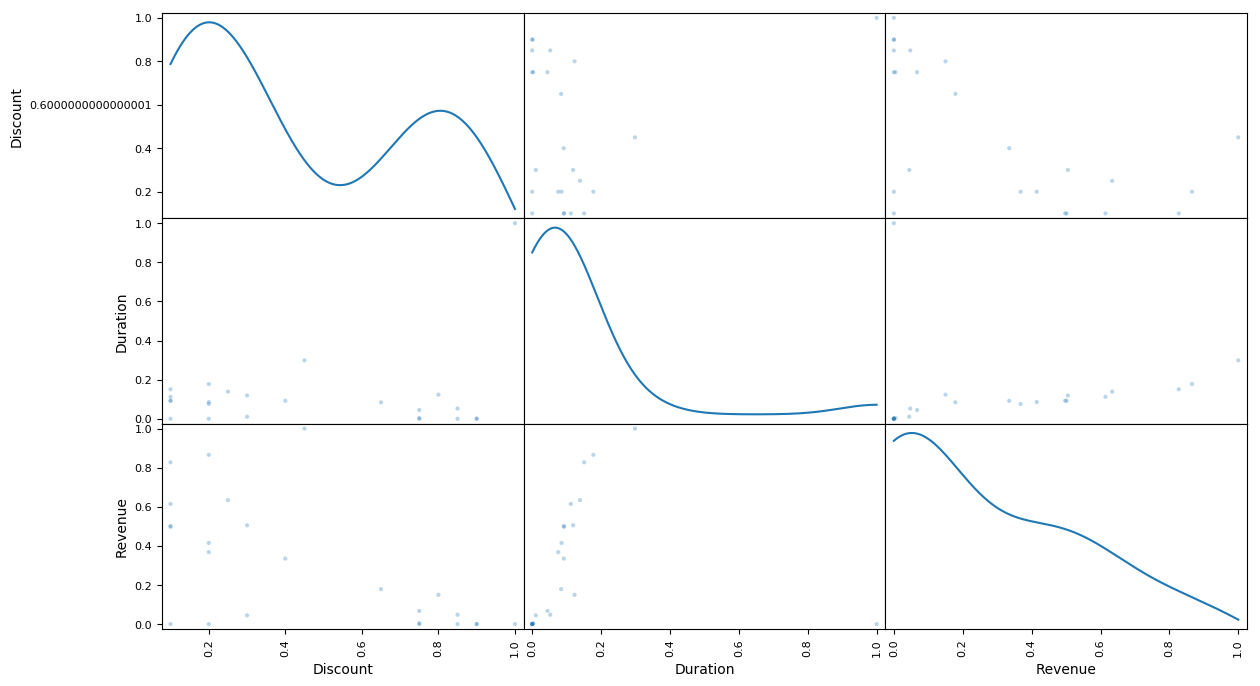

In [30]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(Data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
plt.savefig('t4.png')
plt.show()

In [31]:
cellClassificationData["Discount"],cellClassificationData["Duration"],cellClassificationData["Revenue"]  =  onnetDiscMatrix[0], onnetDurMatrix[0], onnetRevMatrix[0]


In [33]:
cellClassificationData1 = cellClassificationData
cellClassificationData1 = cellClassificationData1.fillna(0)

In [34]:
cellClassificationData1.fillna(0)

,CELL,TECHNOLOGY,CLUSTERTYPE,PROVINCE,Discount,Duration,Revenue
0,1001A,2G,Premium,GAUTENG,0,0,0
1,1001A1,3G,Premium,GAUTENG,85,0,0
2,1001A2,3G,Premium,GAUTENG,100,82.0166666666667,0
3,1001B,2G,Premium,GAUTENG,90,0.0833333333333333,0.01
4,1001B1,3G,Premium,GAUTENG,90,0.0166666666666667,0
5,1001B2,3G,Premium,GAUTENG,75,0,0
6,1001C,2G,Premium,GAUTENG,75,0.266666666666667,0.16
7,1001C1,3G,Premium,GAUTENG,65,6.88333333333333,6
8,1001C2,3G,Premium,GAUTENG,10,7.51666666666667,16.83
9,1002A,2G,High,GAUTENG,20,14.5666666666667,29.05


In [35]:
Gauteng_data = cellClassificationData1[cellClassificationData1.PROVINCE.values=='GAUTENG']

In [36]:
Gauteng_data.head()

,CELL,TECHNOLOGY,CLUSTERTYPE,PROVINCE,Discount,Duration,Revenue
0,1001A,2G,Premium,GAUTENG,0,0,0
1,1001A1,3G,Premium,GAUTENG,85,0,0
2,1001A2,3G,Premium,GAUTENG,100,82.0166666666667,0
3,1001B,2G,Premium,GAUTENG,90,0.0833333333333333,0.01
4,1001B1,3G,Premium,GAUTENG,90,0.0166666666666667,0


In [37]:
Gauteng_data.drop(['CELL','TECHNOLOGY','CLUSTERTYPE','PROVINCE'], 1, inplace=True)

/home/mhla/.local/lib/python2.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [38]:
original = Gauteng_data

In [39]:
original.head()

,Discount,Duration,Revenue
0,0,0,0
1,85,0,0
2,100,82.0166666666667,0
3,90,0.0833333333333333,0.01
4,90,0.0166666666666667,0


In [41]:
min_max_scaler = preprocessing.MinMaxScaler()
Gauteng_data['Revenue'] = min_max_scaler.fit_transform(Gauteng_data.Revenue.values.reshape(-1,1))
Gauteng_data['Duration'] = min_max_scaler.fit_transform(Gauteng_data.Duration.values.reshape(-1,1))
Gauteng_data['Discount'] = min_max_scaler.fit_transform(Gauteng_data.Discount.values.reshape(-1,1))
#Gauteng_data = Gauteng_data[Gauteng_data.index != 0]

/home/mhla/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/mhla/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mhla/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [42]:
Gauteng_data

,Discount,Duration,Revenue
0,0.00,0.000000,0.000000
1,0.85,0.000000,0.000000
2,1.00,1.000000,0.000000
3,0.90,0.001016,0.000344
4,0.90,0.000203,0.000000
5,0.75,0.000000,0.000000
6,0.75,0.003251,0.005508
7,0.65,0.083926,0.206540
8,0.10,0.091648,0.579346
9,0.20,0.177606,1.000000


#### Outlier Detection

Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we'll use Tukey's Method for identfying outliers: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In [43]:
feature_outliers  = []

# For each feature find the data points with extreme high or low values
for feature in Gauteng_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(Gauteng_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(Gauteng_data[feature], 75)
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(Gauteng_data[~((Gauteng_data[feature] >= Q1 - step) & (Gauteng_data[feature] <= Q3 + step))])
    feature_outliers.append(Gauteng_data[~((Gauteng_data[feature] >= Q1 - step) & (Gauteng_data[feature] <= Q3 + step))].index)

# Flatten list of outliers from each iteration of the loop above
outliers_flattened = [index for feature in feature_outliers for index in feature]
# Count the number of features for which a given observation is considered an outlier
from collections import Counter
outlier_count = Counter(outliers_flattened)
# Drop observations that are an outlier in 3 or more dimensions of the feature-space
outliers = [observation for observation in outlier_count.elements() if outlier_count[observation] >= 2]

# Remove the outliers, if any were specified
good_data = Gauteng_data.drop(Gauteng_data.index[outliers]).reset_index(drop = True)


Data points considered outliers for the feature 'Discount':


,Discount,Duration,Revenue
1,0.85,0.000000,0.000000
2,1.00,1.000000,0.000000
3,0.90,0.001016,0.000344
4,0.90,0.000203,0.000000
5,0.75,0.000000,0.000000
6,0.75,0.003251,0.005508
7,0.65,0.083926,0.206540
8,0.10,0.091648,0.579346
9,0.20,0.177606,1.000000
10,0.10,0.112172,0.709811


Data points considered outliers for the feature 'Duration':


,Discount,Duration,Revenue
2,1.00,1.000000,0.000000
3,0.90,0.001016,0.000344
4,0.90,0.000203,0.000000
6,0.75,0.003251,0.005508
7,0.65,0.083926,0.206540
8,0.10,0.091648,0.579346
9,0.20,0.177606,1.000000
10,0.10,0.112172,0.709811
11,0.20,0.075594,0.425129
14,0.30,0.010567,0.051635


Data points considered outliers for the feature 'Revenue':


,Discount,Duration,Revenue
3,0.90,0.001016,0.000344
6,0.75,0.003251,0.005508
7,0.65,0.083926,0.206540
8,0.10,0.091648,0.579346
9,0.20,0.177606,1.000000
10,0.10,0.112172,0.709811
11,0.20,0.075594,0.425129
14,0.30,0.010567,0.051635
15,0.10,0.092664,0.574527
16,0.20,0.085349,0.479174


In [44]:
# The following observations are considered outliers for more than one feature based on Tukey's method of outlier detection

display(set([observation for observation in outlier_count.elements() if outlier_count[observation] >= 2]))

print "{} observations were removed from the dataset.".format(
    len(set([observation for observation in outlier_count.elements() if outlier_count[observation] >= 2])))



{2, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17}

13 observations were removed from the dataset.


### Feature Transformation

In this section we'll use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.



#### Implementation: Dimensionality Reduction¶ 

When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the cumulative explained variance ratio is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
* Assign the results of fitting PCA in two dimensions with good_data to pca.
* Apply a PCA transformation of good_data using pca.transform, and assign the results to reduced_data.
* Apply a PCA transformation of log_samples using pca.transform, and assign the results to pca_samples.

Chosen samples of wholesale customers dataset:


,Discount,Duration,Revenue
0,0.90,0.000203,0.000000
1,0.65,0.083926,0.206540
2,0.10,0.112172,0.709811


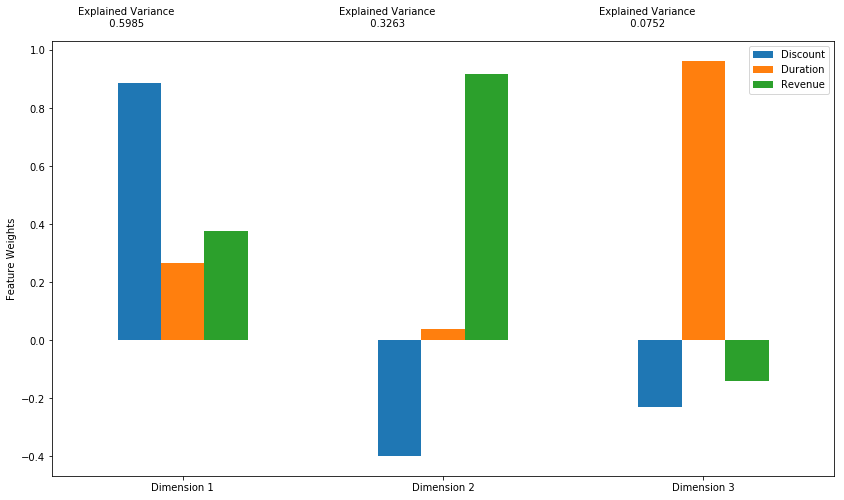

In [48]:
from sklearn.decomposition import PCA
# Apply PCA by fitting the good data with the same number of dimensions as features
num_features = Gauteng_data.shape[1]
pca = PCA(n_components = num_features, random_state = 0)
pca = pca.fit(Gauteng_data)
import visuals as vs

# Sample a few observations from the dataset
indices = [4, 7, 10]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(original.loc[indices], columns = original.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)
# Transform log_samples using the PCA fit above
pca_samples = pca.transform(samples)

# Generate PCA results plot
pca_results = vs.pca_results(Gauteng_data, pca)

In [49]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2, random_state = 0)
pca = pca.fit(Gauteng_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(Gauteng_data)

# Sample a few observations from the dataset
indices = [4, 7, 10]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(Gauteng_data.loc[indices], columns = Gauteng_data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

pca_samples = pca.transform(samples)

Chosen samples of wholesale customers dataset:


,Discount,Duration,Revenue
0,0.90,0.000203,0.000000
1,0.65,0.083926,0.206540
2,0.10,0.112172,0.709811


In [50]:
# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use silhouette score to find optimal number of clusters to segment the data
num_clusters = np.arange(2,4)
kmeans_results = {}
for size in num_clusters:
    kmeans = KMeans(n_clusters = size).fit(reduced_data)
    preds = kmeans.predict(reduced_data)
    kmeans_results[size] = silhouette_score(reduced_data, preds)

best_size = max(kmeans_results, key=kmeans_results.get)

# Build a model with the optimal number of clusters
optimized_kmeans = KMeans(n_clusters = best_size, random_state = 0).fit(reduced_data)
# Assign data to clusters
kmeans_preds = optimized_kmeans.predict(reduced_data)
# Reports the centers of each cluster
kmeans_centers = optimized_kmeans.cluster_centers_
# Store cluster assignment for the three samples we've been manually examining
kmeans_sample_preds = optimized_kmeans.predict(pca_samples)
# Report the best silhouette score 
kmeans_score = silhouette_score(reduced_data, preds)

kmeans_assignment = optimized_kmeans.predict(reduced_data)
sample_kmeans_assignment = optimized_kmeans.predict(pca_samples)

In [52]:
display(kmeans_results)

{2: 0.9988986797213024, 3: 0.9994556310039159}

In [53]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2, random_state = 0)
pca = pca.fit(Gauteng_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(Gauteng_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

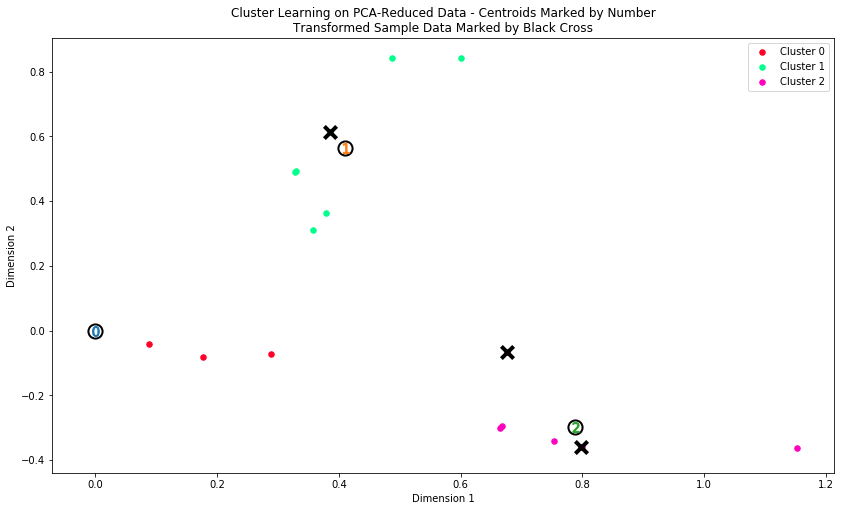

In [54]:
# Display the results of the clustering from implementation of K-means clustering
vs.cluster_results(reduced_data, kmeans_preds, kmeans_centers, pca_samples)

In [57]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(kmeans_centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(kmeans_centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = original.keys())
true_centers.index = segments
display(true_centers)

,Discount,Duration,Revenue
Segment 0,1.0,1.0,1.0
Segment 1,1.0,1.0,2.0
Segment 2,2.0,1.0,1.0
